<a href="https://colab.research.google.com/github/ThrishaJawahar/Falcon-9-Launch-Prediction/blob/main/Falcon9LaunchPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 1: Request the Falcon 9 Launch Wiki page from its URL
import requests

url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"
response = requests.get(url)


In [ ]:
#Task 2: Create a BeautifulSoup object from the HTML response and print the page title
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.title)


<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [ ]:
#Task 3: Extract all column/variable names from the HTML table header
# Find all tables on the page
tables = soup.find_all('table', {'class': 'wikitable'})

# Assuming we're interested in the first table
table = tables[0]

# Extract column headers
headers = table.find_all('th')
column_names = [header.get_text(strip=True) for header in headers]
print(column_names)


['Flight No.', 'Date andtime (UTC)', 'Version,Booster[b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


In [ ]:
# Print the column names to inspect them
print(data.columns)
# Clean column names by stripping extra spaces
data.columns = data.columns.str.strip()

# Check the columns again after cleaning
print(data.columns)


Index(['Flight No.', 'Date and time (UTC)', 'Version, Booster [b]',
       'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')
Index(['Flight No.', 'Date and time (UTC)', 'Version, Booster [b]',
       'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')


In [ ]:
#Task 4: Filter the Falcon 9 launch records from a dataset
import pandas as pd

# Read data from the wikipedia table using pandas
data = pd.read_html(str(table))[0] # Assuming 'table' is the table you extracted in Task 3
print(data.columns)
# Now you can filter the data
data_falcon9 = data[data['Version, Booster [b]'] == 'Falcon 9']
print(data_falcon9)

Index(['Flight No.', 'Date and time (UTC)', 'Version, Booster [b]',
       'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')
Empty DataFrame
Columns: [Flight No., Date and time (UTC), Version, Booster [b], Launch site, Payload[c], Payload mass, Orbit, Customer, Launch outcome, Booster landing]
Index: []


<ipython-input-12-1272527d5b4e>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0] # Assuming 'table' is the table you extracted in Task 3


In [ ]:
#Task 5: Handle missing values for the PayloadMass column and replace NaN values with the mean
# Convert 'Payload mass' column to numeric, handling errors
data['Payload mass'] = pd.to_numeric(data['Payload mass'], errors='coerce')
# Calculate the mean of the 'Payload mass' column, ignoring NaN values
mean_payload_mass = data['Payload mass'].mean()
# Replace NaN values in the 'Payload mass' column with the calculated mean
data['Payload mass'] = data['Payload mass'].fillna(mean_payload_mass)
print(data)

    Flight No.                                Date and time (UTC)  \
0            1                                 4 June 2010, 18:45   
1            1  First flight of Falcon 9 v1.0.[11] Used a boil...   
2            2                         8 December 2010, 15:43[13]   
3            2  Maiden flight of Dragon capsule, consisting of...   
4            3                             22 May 2012, 07:44[17]   
5            3  Dragon spacecraft demonstrated a series of tes...   
6            4                          8 October 2012, 00:35[21]   
7            4                          8 October 2012, 00:35[21]   
8            4  CRS-1 was successful, but the secondary payloa...   
9            5                                1 March 2013, 15:10   
10           5  Last launch of the original Falcon 9 v1.0 laun...   
11           6                       29 September 2013, 16:00[30]   
12           6  First commercial mission with a private custom...   
13           7                    

In [ ]:
#Task 6: Handle missing values for the "Booster landing" column
# Identify the most frequent value in the 'Booster landing' column
most_frequent_booster_landing = data['Booster landing'].mode()[0]

# Replace NaN values in 'Booster landing' with the most frequent value
data['Booster landing'] = data['Booster landing'].fillna(most_frequent_booster_landing)

# Print the updated DataFrame
print(data)


    Flight No.                                Date and time (UTC)  \
0            1                                 4 June 2010, 18:45   
1            1  First flight of Falcon 9 v1.0.[11] Used a boil...   
2            2                         8 December 2010, 15:43[13]   
3            2  Maiden flight of Dragon capsule, consisting of...   
4            3                             22 May 2012, 07:44[17]   
5            3  Dragon spacecraft demonstrated a series of tes...   
6            4                          8 October 2012, 00:35[21]   
7            4                          8 October 2012, 00:35[21]   
8            4  CRS-1 was successful, but the secondary payloa...   
9            5                                1 March 2013, 15:10   
10           5  Last launch of the original Falcon 9 v1.0 laun...   
11           6                       29 September 2013, 16:00[30]   
12           6  First commercial mission with a private custom...   
13           7                    

In [ ]:
#Task 7: Filter Falcon 9 launches
# Filter rows where 'Version, Booster [b]' is 'Falcon 9'
# Check the unique values in the 'Version, Booster [b]' column
unique_boosters = data['Version, Booster [b]'].unique()

# Print the unique values
print(unique_boosters)

# Filter rows that contain 'Falcon 9' anywhere in the 'Version, Booster [b]' column
data_falcon9 = data[data['Version, Booster [b]'].str.contains('Falcon 9', na=False)]

# Print the filtered data
print(data_falcon9)



['F9 v1.0[7] B0003.1[8]'
 'First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]'
 'F9 v1.0[7] B0004.1[8]'
 'Maiden flight of Dragon capsule, consisting of over 3 hours of testing thruster maneuvering and reentry.[15] Attempted to recover the first stage by parachuting it into the ocean, but it disintegrated upon reentry, before the parachutes were deployed.[12] (more details below) It also included two CubeSats,[16] and a wheel of Brouère cheese.'
 'F9 v1.0[7] B0005.1[8]'
 'Dragon spacecraft demonstrated a series of tests before it was allowed to approach the International Space Station. Two days later, it became the first commercial spacecraft to board the ISS.[17] (more details below)'
 'F9 v1.0[7] B0006.1[8]'
 "CRS-1 was successful, but the 

In [ ]:
# Assuming `data` is the DataFrame
# Let's check the first few rows to understand the structure better
print(data.head())

# You can manually clean or select the relevant columns, for example:
data_cleaned = data[['Flight No.', 'Version, Booster [b]', 'Launch site', 'Launch outcome']]

# Now, if you want to further clean, use text parsing or regular expressions to extract specific information from the column
import re

# Example: Extract numbers or specific keywords from 'Version, Booster [b]' column
data_cleaned['Version'] = data_cleaned['Version, Booster [b]'].apply(lambda x: re.findall(r'Falcon \d+', x))

# Display the cleaned data
print(data_cleaned)


   Flight No.                                Date and time (UTC)  \
0           1                                 4 June 2010, 18:45   
1           1  First flight of Falcon 9 v1.0.[11] Used a boil...   
2           2                         8 December 2010, 15:43[13]   
3           2  Maiden flight of Dragon capsule, consisting of...   
4           3                             22 May 2012, 07:44[17]   

                                Version, Booster [b]  \
0                              F9 v1.0[7] B0003.1[8]   
1  First flight of Falcon 9 v1.0.[11] Used a boil...   
2                              F9 v1.0[7] B0004.1[8]   
3  Maiden flight of Dragon capsule, consisting of...   
4                              F9 v1.0[7] B0005.1[8]   

                                         Launch site  \
0                                      CCAFS, SLC-40   
1  First flight of Falcon 9 v1.0.[11] Used a boil...   
2                                      CCAFS, SLC-40   
3  Maiden flight of Dragon cap

<ipython-input-22-5276621c75fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Version'] = data_cleaned['Version, Booster [b]'].apply(lambda x: re.findall(r'Falcon \d+', x))


In [ ]:
#Task 8: Data Transformation
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Flight No.': ['F9 v1.0 B0003.1', 'F9 v1.0 B0004.1', 'F9 v1.0 B0005.1', 'F9 v1.0 B0006.1', 'F9 v1.1 B1003'],
    'Version': ['First flight of Falcon 9 v1.0.', 'Maiden flight of Dragon capsule', 'Dragon spacecraft test',
                'CRS-1 mission with secondary payload loss', 'First commercial mission with private customer'],
    'Payload': ['Dragon capsule', 'Dragon capsule with CubeSats', 'Dragon spacecraft with ISS test',
                'Secondary payload loss due to engine shutdown', 'Canadian satellites'],
    'Launch Site': ['Cape Canaveral', 'Cape Canaveral', 'Cape Canaveral', 'Cape Canaveral', 'Vandenberg'],
    'Launch Outcome': ['Failed, burned up during reentry', 'Failed, disintegrated on reentry', 'Successful with ISS test',
                       'Failed due to engine shutdown', 'Successful, SES-8 satellite insertion']
}

df = pd.DataFrame(data)

# Step 1: Fill missing data (if any). Here we assume 'Payload' and 'Launch Outcome' might have some missing values.
# Filling missing values with 'Unknown' or suitable placeholder
df['Payload'] = df['Payload'].fillna('Unknown')
df['Launch Outcome'] = df['Launch Outcome'].fillna('Unknown')

# Step 2: Remove rows with irrelevant information (e.g., any that mention 'Failed' in 'Launch Outcome')
df_cleaned = df[~df['Launch Outcome'].str.contains('Failed', na=False)]

# Step 3: Reformat data by trimming any excessive text and focusing on key parts of the string.
# For example, we can extract only the version type from 'Version' column (e.g., "Falcon 9 v1.0" instead of full description)
df_cleaned['Version'] = df_cleaned['Version'].apply(lambda x: ' '.join(x.split()[:3]))  # Extract only the "Falcon 9 v1.0" part

# Step 4: Display the cleaned DataFrame
print(df_cleaned)


        Flight No.                   Version                          Payload  \
2  F9 v1.0 B0005.1    Dragon spacecraft test  Dragon spacecraft with ISS test   
4    F9 v1.1 B1003  First commercial mission              Canadian satellites   

      Launch Site                         Launch Outcome  
2  Cape Canaveral               Successful with ISS test  
4      Vandenberg  Successful, SES-8 satellite insertion  


<ipython-input-23-90e73f80e8f2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Version'] = df_cleaned['Version'].apply(lambda x: ' '.join(x.split()[:3]))  # Extract only the "Falcon 9 v1.0" part


In [ ]:
#Task 9: Data Merging and Joining
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({
    'Flight No.': [1, 5, 6, 7],
    'Version': ['F9 v1.0', 'F9 v1.0', 'F9 v1.1', 'F9 v1.1'],
    'Launch Outcome': ['Success', 'Failure', 'Success', 'Success']
})

df2 = pd.DataFrame({
    'Flight No.': [1, 5, 6, 7],
    'Payload': ['Dragon', 'Dragon', 'Dragon', 'SES-8'],
    'Customer': ['NASA', 'NASA', 'NASA', 'SES']
})

# Merging DataFrames on 'Flight No.'
merged_df = pd.merge(df1, df2, on='Flight No.')

print(merged_df)


   Flight No.  Version Launch Outcome Payload Customer
0           1  F9 v1.0        Success  Dragon     NASA
1           5  F9 v1.0        Failure  Dragon     NASA
2           6  F9 v1.1        Success  Dragon     NASA
3           7  F9 v1.1        Success   SES-8      SES


In [ ]:
#Task 10: Data Grouping and Aggregation
# Sample DataFrame with payload mass
df = pd.DataFrame({
    'Version': ['F9 v1.0', 'F9 v1.0', 'F9 v1.1', 'F9 v1.1'],
    'Payload Mass': [4000, 4500, 6000, 7000],
    'Launch Outcome': ['Success', 'Failure', 'Success', 'Success']
})

# Grouping by 'Version' and calculating the mean and count of payload mass
grouped_df = df.groupby('Version').agg({'Payload Mass': 'mean', 'Launch Outcome': 'count'}).rename(columns={'Launch Outcome': 'Launch Count'})

print(grouped_df)


         Payload Mass  Launch Count
Version                            
F9 v1.0        4250.0             2
F9 v1.1        6500.0             2


In [ ]:
#Task 11: Handling Categorical Data
# Sample DataFrame with Launch Outcome
df = pd.DataFrame({
    'Flight No.': [1, 5, 6, 7],
    'Launch Outcome': ['Success', 'Failure', 'Success', 'Success']
})

# Mapping categorical values to numerical
df['Launch Outcome'] = df['Launch Outcome'].map({'Success': 1, 'Failure': 0})

print(df)


   Flight No.  Launch Outcome
0           1               1
1           5               0
2           6               1
3           7               1


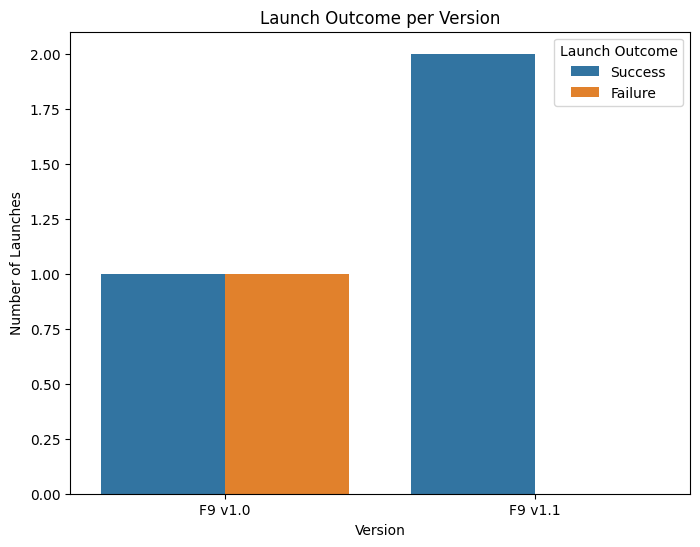

In [ ]:
#Task 12: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with Launch Outcome
df = pd.DataFrame({
    'Version': ['F9 v1.0', 'F9 v1.0', 'F9 v1.1', 'F9 v1.1'],
    'Launch Outcome': ['Success', 'Failure', 'Success', 'Success']
})

# Plotting
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Version', hue='Launch Outcome')
plt.title('Launch Outcome per Version')
plt.ylabel('Number of Launches')
plt.show()


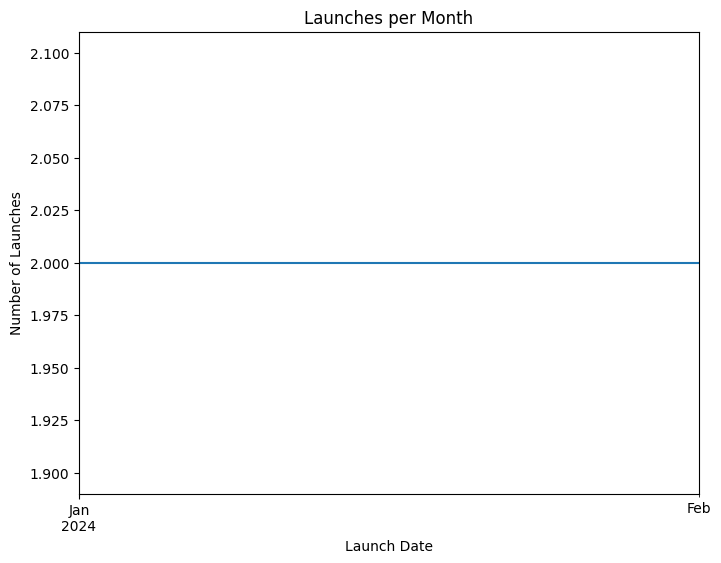

In [ ]:
#Task 13: Time Series Analysis
# Sample DataFrame with Launch Date
df = pd.DataFrame({
    'Launch Date': ['2024-01-01', '2024-01-15', '2024-02-01', '2024-02-15'],
    'Flight No.': [1, 5, 6, 7],
})

# Converting 'Launch Date' to datetime
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

# Grouping by month and year
monthly_launches = df.groupby(df['Launch Date'].dt.to_period('M')).size()

# Plotting
monthly_launches.plot(kind='line', figsize=(8, 6), title='Launches per Month')
plt.ylabel('Number of Launches')
plt.show()


In [ ]:
#Task 14: Data Normalization
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample DataFrame with Payload Mass
df = pd.DataFrame({
    'Payload Mass': [4000, 4500, 6000, 7000]
})

# Normalizing the data
scaler = StandardScaler()
df['Normalized Payload Mass'] = scaler.fit_transform(df[['Payload Mass']])

print(df)


   Payload Mass  Normalized Payload Mass
0          4000                -1.153113
1          4500                -0.733799
2          6000                 0.524142
3          7000                 1.362770


In [ ]:
#Feature Engineering
# Sample DataFrame with Launch Outcome
df = pd.DataFrame({
    'Flight No.': [1, 5, 6, 7],
    'Launch Outcome': ['Success', 'Failure', 'Success', 'Success']
})

# Creating a new binary feature
df['Launch Success'] = df['Launch Outcome'].map({'Success': 1, 'Failure': 0})

print(df)


   Flight No. Launch Outcome  Launch Success
0           1        Success               1
1           5        Failure               0
2           6        Success               1
3           7        Success               1


In [ ]:
#Task 16: Outlier Detection
import numpy as np

# Sample DataFrame with Payload Mass
df = pd.DataFrame({
    'Payload Mass': [4000, 4500, 6000, 7000, 15000]
})

# Calculating z-scores
z_scores = (df['Payload Mass'] - df['Payload Mass'].mean()) / df['Payload Mass'].std()

# Marking outliers (those with z-score > 3)
df['Outlier'] = np.abs(z_scores) > 3

print(df)


   Payload Mass  Outlier
0          4000    False
1          4500    False
2          6000    False
3          7000    False
4         15000    False


In [33]:
import pandas as pd

# Read the CSV file from the URL
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Display the first 10 rows of the DataFrame
print(df.head(10))


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   
6             7  2014-04-18       Falcon 9  2296.000000   ISS  CCAFS SLC 40   
7             8  2014-07-14       Falcon 9  1316.000000   LEO  CCAFS SLC 40   
8             9  2014-08-05       Falcon 9  4535.000000   GTO  CCAFS SLC 40   
9            10  2014-09-07       Falcon 9  4428.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN 

In [34]:
#Task 17 Analyzing the number of launches at each site
df['LandingPad'].fillna(df['LandingPad'].mode()[0], inplace=True)
df.dropna(subset=['LandingPad'], inplace=True)
#Task ONE Calculate the number of launches on each site
launch_counts = df['LaunchSite'].value_counts()

# Display the result
print(launch_counts)


LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


<ipython-input-34-c974db4bd9b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LandingPad'].fillna(df['LandingPad'].mode()[0], inplace=True)


In [35]:
# Task 18 Calculate the number of launches for each orbit
orbit_counts = df['Orbit'].value_counts()

# Display the result
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [36]:
#Task 19 Calculate the number of occurrences of each mission outcome
landing_outcomes = df['Outcome'].value_counts()

# Display the result
print(landing_outcomes)


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [37]:
# Iterate over the landing outcomes to display index and outcome
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i, outcome)

# Create a set of bad outcomes (assuming these are based on the indices 1, 3, 5, 6, and 7)
bad_outcomes = set(list(landing_outcomes.keys())[1:8:2])  # Picking indices 1, 3, 5, 6, 7
print("Bad outcomes:", bad_outcomes)


0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS
Bad outcomes: {'False Ocean', 'False RTLS', 'False ASDS', 'None None'}


In [38]:
#Task 20 Create a list for landing_class based on whether the outcome is in bad_outcomes or not
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

# Assign this list to the landing_class variable
df['LandingOutcomeLabel'] = landing_class

# Display the first few rows to verify the changes
df[['Outcome', 'LandingOutcomeLabel']].head()


,Outcome,LandingOutcomeLabel
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0


In [39]:
#Task 21 Calculating the mean of the success rate
df['Class']=landing_class
df[['Class']].head(8)
df.head(5)
df["Class"].mean()

0.6888888888888889

In [40]:
#Task 22 Count the number of launches from each launch site
launch_site_counts = df['LaunchSite'].value_counts()

# Filter for the number of launches from 'CCAFS SLC 40'
launches_ccafs_slc_40 = launch_site_counts.get('CCAFS SLC 40', 0)

# Print the result
print(f"Number of launches from CCAFS SLC 40: {launches_ccafs_slc_40}")


Number of launches from CCAFS SLC 40: 55


In [41]:
#Task 23 Define the set of landing outcomes that represent a complete failure to land
failure_outcomes = {'None ASDS', 'None RTLS', 'None None'}

# Filter the rows where Outcome is one of the failure outcomes
failure_landings = df[df['Outcome'].isin(failure_outcomes)]

# Count the number of such outcomes
failure_landings_count = failure_landings.shape[0]

# Print the result
print(f"Number of landing outcomes that represent a complete failure to land: {failure_landings_count}")


Number of landing outcomes that represent a complete failure to land: 21


In [5]:
!pip install sqlalchemy==1.3.9
!pip install ipython-sql
!pip install pandas


  Using cached SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.
langchain 0.3.12 requires SQLAlchemy<3,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
  Using cached SQLAlchemy-2.0.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
Using cached SQLAlchemy-2.0.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9

In [6]:
from google.colab import files
import pandas as pd
import sqlite3
import io

# Enabling SQL magic for use in Google Colab
%load_ext sql


In [7]:
# Upload the CSV file
uploaded = files.upload()


Saving Spacex.csv to Spacex (4).csv


In [8]:
# Read the CSV file into a pandas DataFrame
# Assuming the uploaded file is named 'Spacex.csv'
# Replace 'Spacex.csv' with the actual filename if different
df = pd.read_csv(io.BytesIO(uploaded['Spacex (4).csv']))

# Display the first 5 rows of the DataFrame to confirm it's loaded correctly
df.head()


,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [14]:
# Import SQLite and load the SQL extension in Colab
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

# Load the SQL extension for use in Google Colab
%reload_ext sql


In [19]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [20]:


# Save the DataFrame into the SQLite database table named "SPACEXTBL"
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")


101

In [18]:
# Drop the table if it already exists (optional)
%sql DROP TABLE IF EXISTS SPACEXTABLE;

# Create a new table excluding rows where "Date" is NULL
%sql CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE "Date" IS NOT NULL;


 * sqlite:///my_data1.db
Done.
 * sqlite:///my_data1.db
Done.


[]

In [21]:
#Task 24 Retrieve Unique Launch Sites
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [22]:
#Task 25 Query to select 5 records where the launch site begins with 'CCA'
%sql SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5;


 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [25]:
#Task 26 Calculate Total Payload Mass for NASA (CRS)
%sql SELECT SUM("PAYLOAD_MASS__KG_") AS total_payload_mass FROM SPACEXTABLE WHERE "Customer" = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


total_payload_mass
45596


In [27]:
#Task 27 Query to calculate the average payload mass for booster version F9 v1.1
%sql SELECT AVG("PAYLOAD_MASS__KG_") AS avg_payload_mass FROM SPACEXTABLE WHERE "Booster_Version" = 'F9 v1.1';


 * sqlite:///my_data1.db
Done.


avg_payload_mass
2928.4


In [28]:
#Task 28 Query to get the date of the first successful landing outcome on the ground pad (True RTLS)
%sql SELECT MIN("Date") AS first_successful_landing_on_ground_pad FROM SPACEXTABLE WHERE "Landing_Outcome" = 'True RTLS';


 * sqlite:///my_data1.db
Done.


first_successful_landing_on_ground_pad
None


In [29]:
#Task 29 Query to list the names of the boosters that have successful drone ship landing
# and payload mass between 4000 and 6000
%sql SELECT DISTINCT "Booster_Version" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'True ASDS' AND "PAYLOAD_MASS__KG_" > 4000 AND "PAYLOAD_MASS__KG_" < 6000;


 * sqlite:///my_data1.db
Done.


Booster_Version


In [30]:
#Task 30 Query to count the total number of successful and failed mission outcomes
%sql SELECT "Mission_Outcome", COUNT(*) FROM SPACEXTABLE GROUP BY "Mission_Outcome";


 * sqlite:///my_data1.db
Done.


Mission_Outcome,COUNT(*)
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [32]:
#Task 31 Find the Booster Version with Maximum Payload Mass
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "PAYLOAD_MASS__KG_" = (SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [40]:
#Task 32 Retrieve Launch Data for Failures on Drone Ship in 2015, Grouped by Month
%sql SELECT \
CASE \
WHEN substr("Date", 6, 2) = '01' THEN 'January'\
WHEN substr("Date", 6, 2) = '02' THEN 'February'\
WHEN substr("Date", 6, 2) = '03' THEN 'March'\
WHEN substr("Date", 6, 2) = '04' THEN 'April'\
WHEN substr("Date", 6, 2) = '05' THEN 'May'\
WHEN substr("Date", 6, 2) = '06' THEN 'June'\
WHEN substr("Date", 6, 2) = '07' THEN 'July'\
WHEN substr("Date", 6, 2) = '08' THEN 'August'\
WHEN substr("Date", 6, 2) = '09' THEN 'September'\
WHEN substr("Date", 6, 2) = '10' THEN 'October'\
WHEN substr("Date", 6, 2) = '11' THEN 'November'\
WHEN substr("Date", 6, 2) = '12' THEN 'December'\
ELSE 'Unknown'\
END AS Month,\
"Landing_Outcome", \
"Booster_Version", \
"Launch_Site"\
FROM SPACEXTABLE\
WHERE substr("Date", 1, 4) = '2015' \
AND "Landing_Outcome" = 'Failure (Drone Ship)';


 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site


In [44]:
#Task 33 Count and Group Landing Outcomes between Specific Date Range
%sql
%sql SELECT "Landing_Outcome", COUNT(*) AS Landing_Outcome_Count FROM SPACEXTABLE WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing_Outcome" ORDER BY Landing_Outcome_Count DESC; GROUP BY "Landing_Outcome" ORDER BY Landing_Outcome_Count DESC;


 * sqlite:///my_data1.db
 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "GROUP": syntax error
[SQL: GROUP BY "Landing_Outcome" ORDER BY Landing_Outcome_Count DESC;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


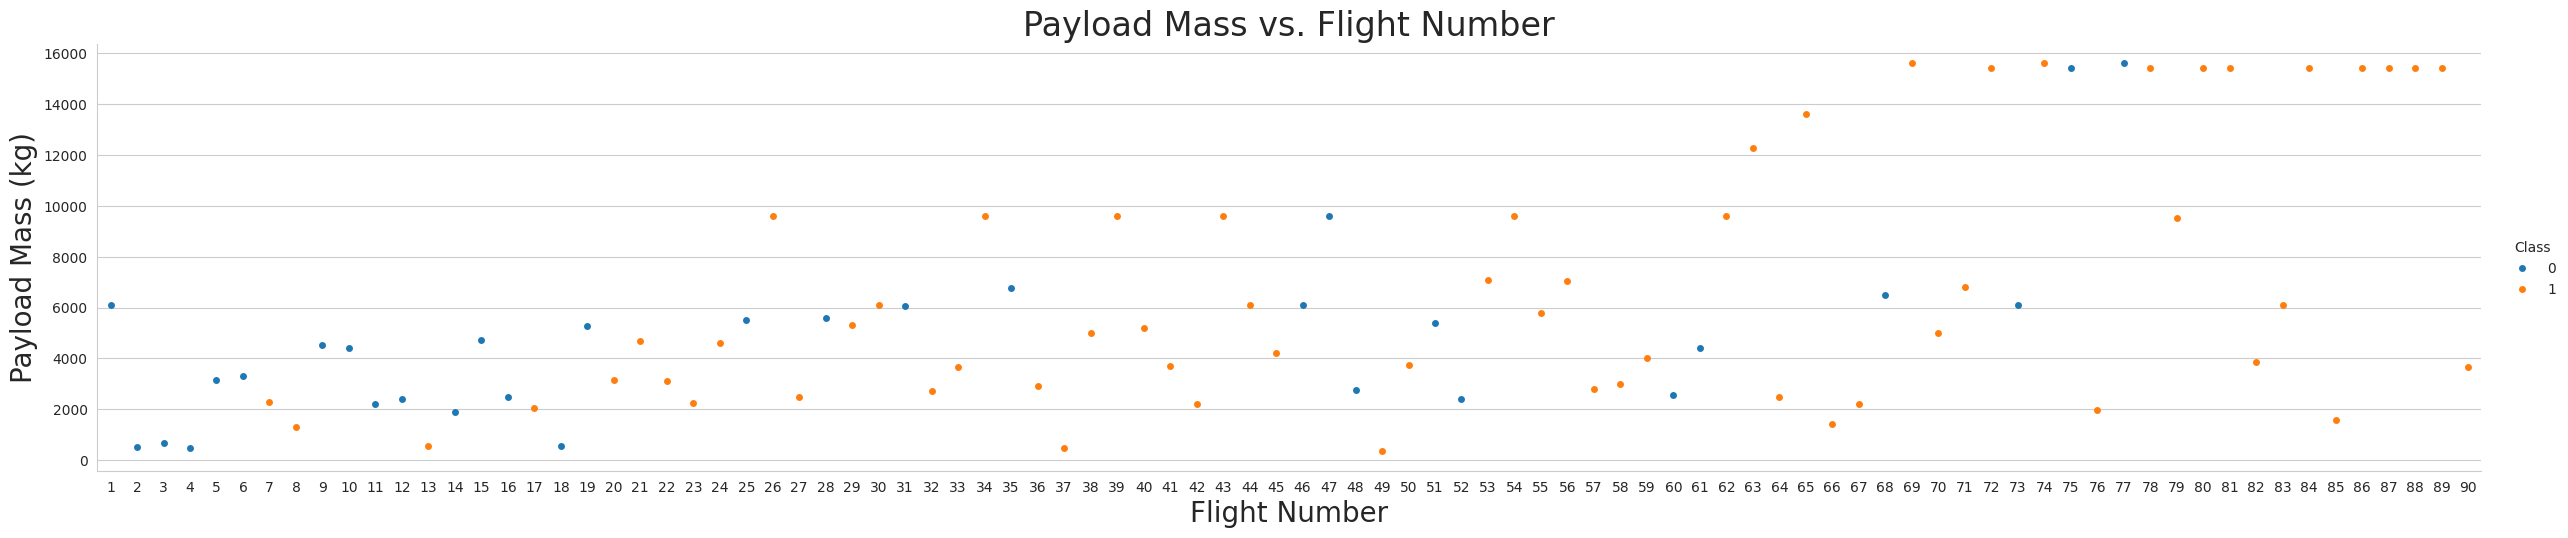

In [45]:
#Task 34 Visualise
#Step 1: Install and import required packages
!pip install seaborn pandas matplotlib

# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

# Step 3: Fetch the dataset from the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset = io.StringIO(response.text)

# Step 4: Load the dataset into a DataFrame
df = pd.read_csv(dataset)

# Step 5: Create the visualization
sns.set_style("whitegrid")  # Optional: Set plot style
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Payload Mass vs. Flight Number", fontsize=24)  # Optional: Add title
plt.show()


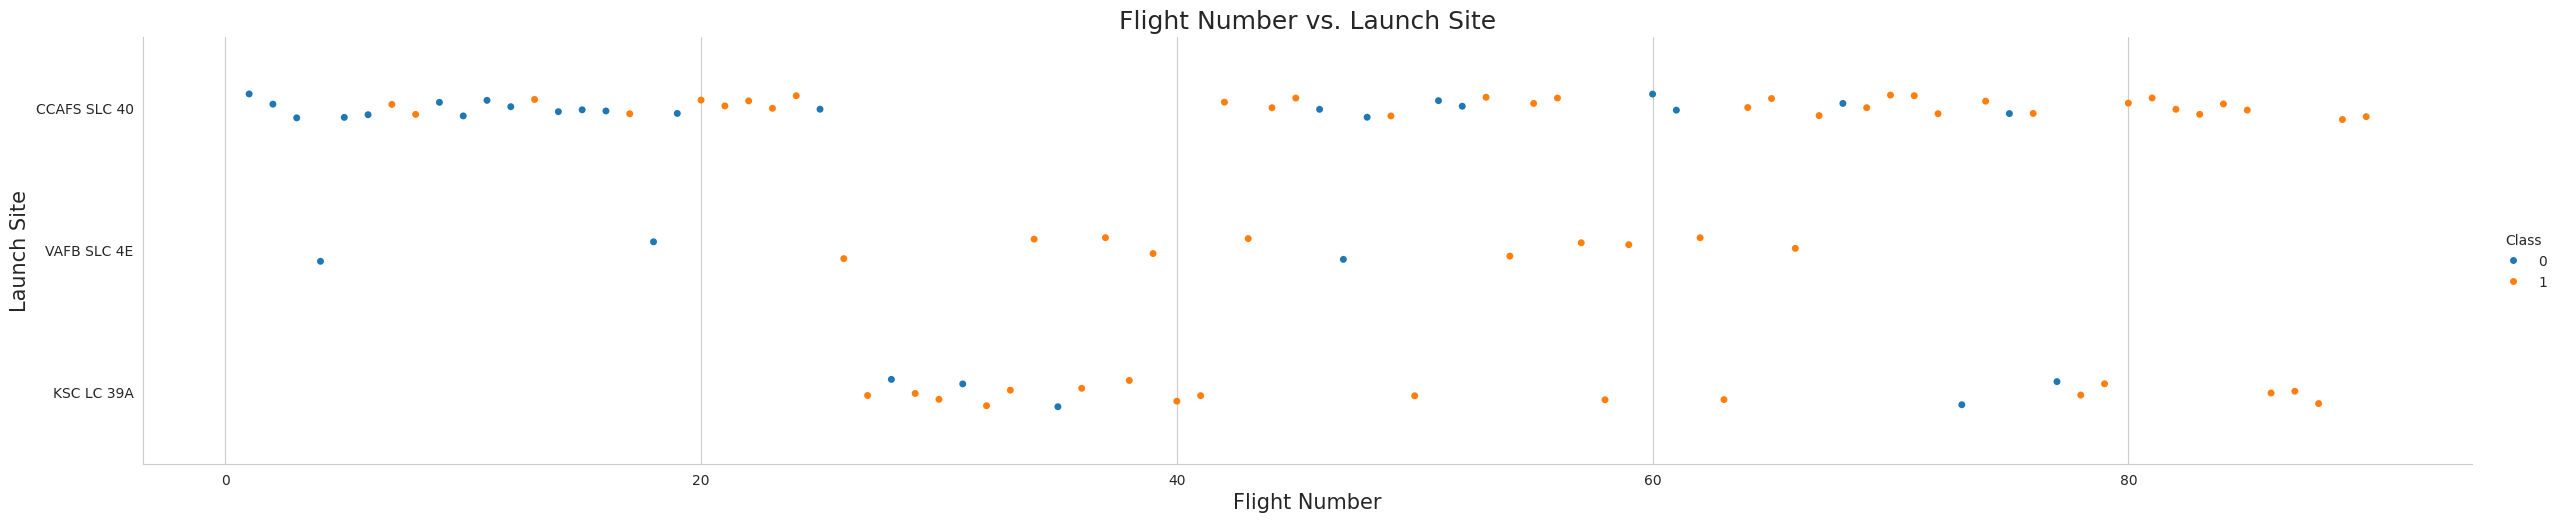

In [46]:
#Task 35 Visualize Flight Number vs Launch Site with hue='Class'
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5, kind="strip")
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs. Launch Site", fontsize=18)  # Optional title
plt.show()


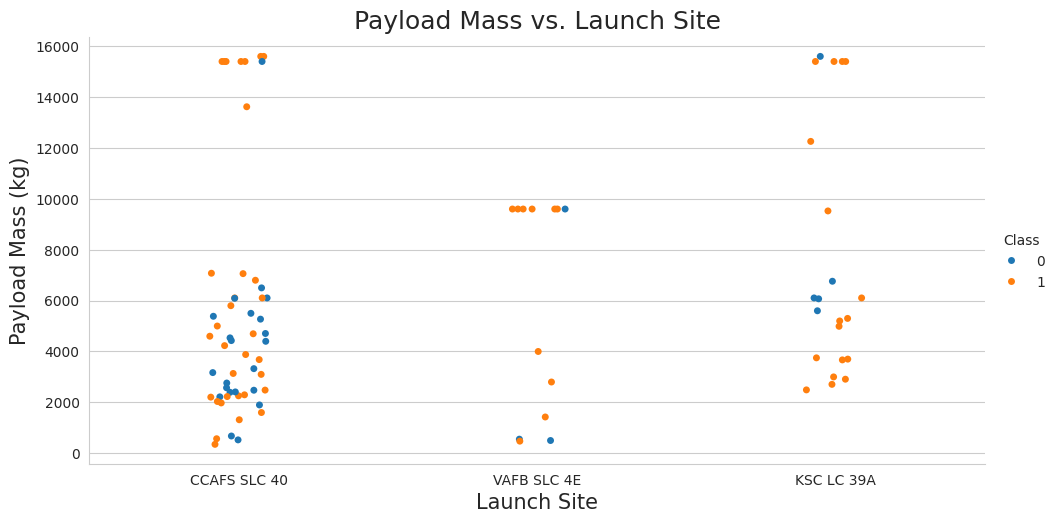

In [47]:
#Task 36 Visualize Payload Mass vs Launch Site with hue='Class'
sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, aspect=2, kind="strip")
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Payload Mass vs. Launch Site", fontsize=18)  # Optional title
plt.show()



<ipython-input-48-88cc540c637d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="SuccessRate", data=orbit_success_rate, palette="viridis")


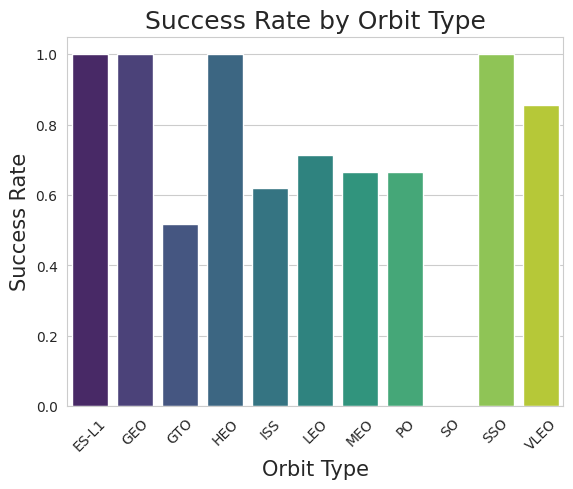

In [48]:
#Task 37 Calculate success rate for each orbit type
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success_rate.rename(columns={"Class": "SuccessRate"}, inplace=True)

# Plot the bar chart
sns.barplot(x="Orbit", y="SuccessRate", data=orbit_success_rate, palette="viridis")
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


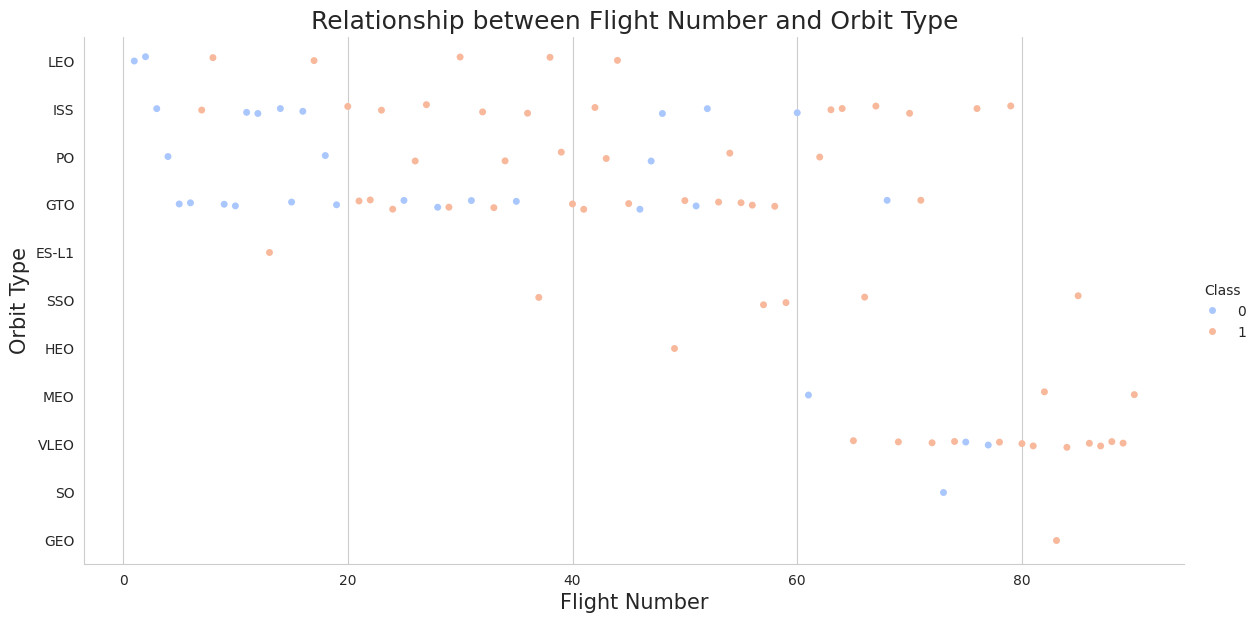

In [49]:
#Task 38 Create a scatter plot for FlightNumber vs Orbit
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, kind="strip", height=6, aspect=2, palette="coolwarm")

# Customize the plot
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=18)
plt.show()


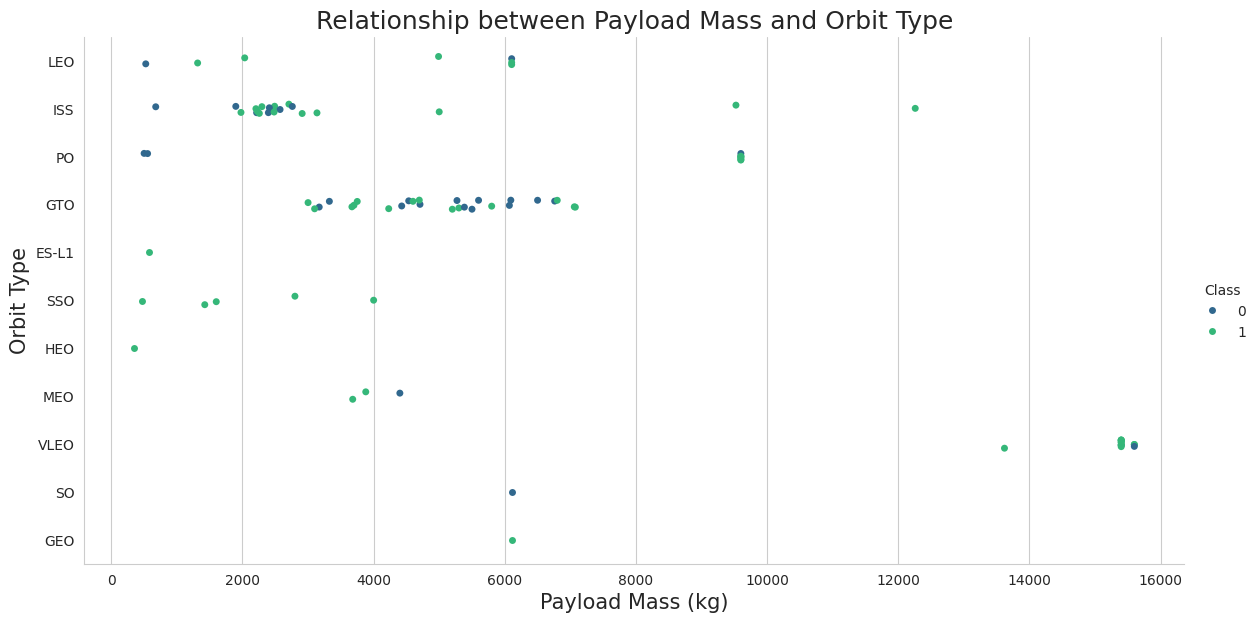

In [50]:
#Task 39 Create a scatter plot for Payload Mass vs Orbit
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, kind="strip", height=6, aspect=2, palette="viridis")

# Customize the plot
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=18)
plt.show()


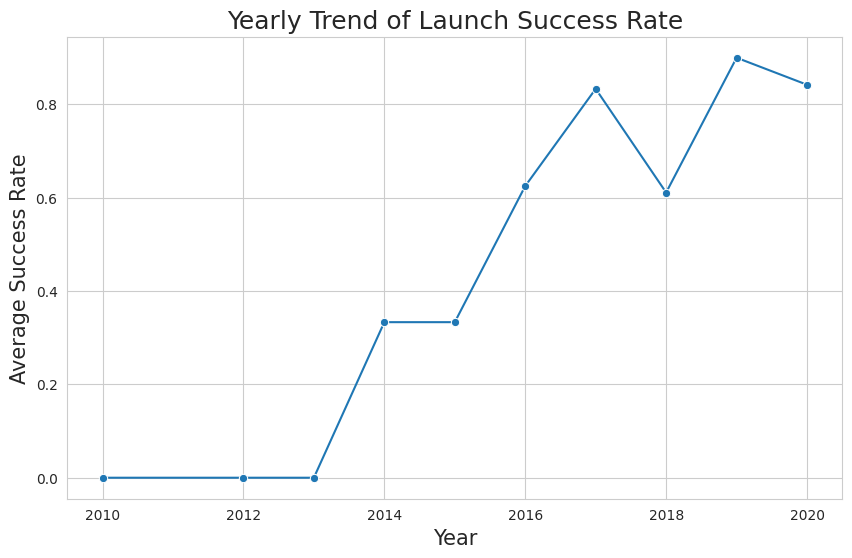

In [51]:
#Task 40 Yearly Trend of Launch Success Rate
#First, extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the average success rate for each year
success_rate_per_year = df.groupby('Year')['Class'].mean()

# Create a line plot to visualize the yearly trend of launch success
plt.figure(figsize=(10, 6))
sns.lineplot(x=success_rate_per_year.index, y=success_rate_per_year.values, marker='o')

# Customize the plot
plt.title("Yearly Trend of Launch Success Rate", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.grid(True)
plt.show()


In [52]:
#Task 41 Selecting the features required for prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]

# Display the first few rows of the features DataFrame
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [53]:
# One-hot encoding for categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the updated DataFrame with encoded features
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# Cast the entire dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Verify the data types
features_one_hot.dtypes



,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64
...,...
Serial_B1056,float64
Serial_B1058,float64
Serial_B1059,float64
Serial_B1060,float64


In [55]:
# One hot encode the specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Get the total number of columns in the features_one_hot dataframe
total_columns = features_one_hot.shape[1]

# Display the result
print(f"Total number of columns after one-hot encoding: {total_columns}")


Total number of columns after one-hot encoding: 80


In [1]:
#Task 42 Visualize Launch Sites and Outcomes on a Map with Distance Calculation
import folium
from geopy.distance import geodesic

# Sample data
launch_sites = {
    "CCAFS LC-40": [28.3922, -80.6077],
    "KSC LC-39B": [28.5721, -80.6480],
    "VAFB SLC-4E": [34.6328, -120.6108],
    "CCAFS SLC-40": [28.3922, -80.6077],
}

launch_outcomes = {
    "CCAFS LC-40": {"coordinates": [28.3922, -80.6077], "outcome": "Success"},
    "KSC LC-39B": {"coordinates": [28.5721, -80.6480], "outcome": "Failure"},
    "VAFB SLC-4E": {"coordinates": [34.6328, -120.6108], "outcome": "Success"},
    "CCAFS SLC-40": {"coordinates": [28.3922, -80.6077], "outcome": "Failure"},
}

# Create a map centered around Florida
map_center = [28.3922, -80.6077]
map_obj = folium.Map(location=map_center, zoom_start=6)

# Mark launch sites and their outcomes
for site, details in launch_outcomes.items():
    outcome_color = "green" if details["outcome"] == "Success" else "red"
    folium.Marker(
        location=details["coordinates"],
        popup=f"{site} - {details['outcome']}",
        icon=folium.Icon(color=outcome_color, icon="cloud"),
    ).add_to(map_obj)

# Function to calculate distance
def calculate_distance(site1, site2):
    return geodesic(site1, site2).kilometers

# Example: Distance calculation between CCAFS LC-40 and KSC LC-39B
distance = calculate_distance(launch_sites["CCAFS LC-40"], launch_sites["KSC LC-39B"])
print(f"Distance between CCAFS LC-40 and KSC LC-39B: {distance:.2f} km")

# Display the map
map_obj


Distance between CCAFS LC-40 and KSC LC-39B: 20.32 km


In [2]:
#Task 43 Extract and Convert the 'Class' Column to a NumPy Array
import pandas as pd

# Load the datasets
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

# Read the datasets
df1 = pd.read_csv(URL1)
df2 = pd.read_csv(URL2)

# Extract the 'Class' column from df1 and convert it to a NumPy array
Y = df1['Class'].to_numpy()

# Display the result
print("NumPy array Y:")
print(Y)


NumPy array Y:
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [3]:
#Task 44 Standardize the Feature Data (X) after One-Hot Encoding
from sklearn.preprocessing import StandardScaler

# Assuming X is the features dataframe from previous steps
X = df1[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# One-hot encode the categorical columns (if not done already)
X = pd.get_dummies(X, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reassign standardized data back to X
X = pd.DataFrame(X, columns=scaler.feature_names_in_)

# Display the standardized data
print("Standardized X:")
print(X.head())


Standardized X:
   FlightNumber   PayloadMass   Flights  GridFins    Reused      Legs  \
0     -1.712912 -1.948145e-16 -0.653913 -1.870829 -0.835532 -1.933091   
1     -1.674419 -1.195232e+00 -0.653913 -1.870829 -0.835532 -1.933091   
2     -1.635927 -1.162673e+00 -0.653913 -1.870829 -0.835532 -1.933091   
3     -1.597434 -1.200587e+00 -0.653913 -1.870829 -0.835532 -1.933091   
4     -1.558942 -6.286706e-01 -0.653913 -1.870829 -0.835532 -1.933091   

      Block  ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  \
0 -1.575895     -0.97344       -0.106     -0.106  ...     -0.215666   
1 -1.575895     -0.97344       -0.106     -0.106  ...     -0.215666   
2 -1.575895     -0.97344       -0.106     -0.106  ...     -0.215666   
3 -1.575895     -0.97344       -0.106     -0.106  ...     -0.215666   
4 -1.575895     -0.97344       -0.106     -0.106  ...     -0.215666   

   Serial_B1049  Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  \
0     -0.267261        -0.106     -0.242536

In [4]:
#Task 45 Split the Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (72, 80)
X_test shape: (18, 80)
Y_train shape: (72,)
Y_test shape: (18,)


In [5]:
#Task 46 Perform Grid Search for Logistic Regression Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Step 2: Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Only L2 is supported by default in LogisticRegression
    'solver': ['lbfgs']  # Common solver for L2 regularization
}

# Step 3: Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(logreg, param_grid=parameters, cv=10, scoring='accuracy')

# Step 4: Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and best score
print("Best parameters found:", logreg_cv.best_params_)
print("Best cross-validation accuracy:", logreg_cv.best_score_)


Best parameters found: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8214285714285714


In [6]:
#Task 47 Calculate accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)

print(f"Accuracy on test data: {test_accuracy:.4f}")


Accuracy on test data: 0.8333


In [7]:
#Task 48 Perform Grid Search for Support Vector Machine (SVM) Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM parameters for GridSearchCV
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Create the SVM object
svm = SVC()

# Create the GridSearchCV object with cv=10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Display the best parameters and best score
print(f"Best Parameters: {svm_cv.best_params_}")
print(f"Best Score: {svm_cv.best_score_:.4f}")


Best Parameters: {'C': 1, 'kernel': 'sigmoid'}
Best Score: 0.8482


In [8]:
#Task 49 Calculate the accuracy on the test data using the best model from GridSearchCV
test_accuracy = svm_cv.score(X_test, Y_test)

print(f"Accuracy on test data: {test_accuracy:.4f}")


Accuracy on test data: 0.8333


In [9]:
#Task 50 Perform Grid Search for Decision Tree Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Define the hyperparameters to tune
parameters = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [2, 4, 6, 8, 10],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples required to be at a leaf node
}

# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters found:", tree_cv.best_params_)
print("Best accuracy score from GridSearchCV:", tree_cv.best_score_)


Best parameters found: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy score from GridSearchCV: 0.8714285714285713


In [10]:
#Task 51 Calculate the accuracy of the best model on the test data
accuracy = tree_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy of the Decision Tree on test data:", accuracy)



Accuracy of the Decision Tree on test data: 0.8333333333333334


In [11]:
#Task 52 Perform Grid Search for K-Nearest Neighbors Hyperparameter Tuning
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
knn_parameters = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create the KNN classifier object
knn = KNeighborsClassifier()

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
knn_cv = GridSearchCV(knn, knn_parameters, cv=10)

# Fit the GridSearchCV object
knn_cv.fit(X_train, Y_train)

# Display the best parameters
print("Best parameters for KNN:", knn_cv.best_params_)


Best parameters for KNN: {'n_neighbors': 3}


In [12]:
#Task 53 Calculate the accuracy of the KNN model on the test data using the score method
knn_accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy
print(f"Accuracy of KNN on the test data: {knn_accuracy * 100:.2f}%")


Accuracy of KNN on the test data: 66.67%


In [13]:
#Task 54 Compare Model Performance and Identify the Best Model Based on Accuracy
# Get the accuracy scores for each model
logreg_accuracy = logreg_cv.score(X_test, Y_test)
svm_accuracy = svm_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.score(X_test, Y_test)

# Store the accuracy scores in a dictionary
model_accuracies = {
    "Logistic Regression": logreg_accuracy,
    "Support Vector Machine": svm_accuracy,
    "Decision Tree": tree_accuracy,
    "K-Nearest Neighbors": knn_accuracy
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Display the result
print(f"The best performing model is: {best_model} with an accuracy of {best_accuracy * 100:.2f}%")


The best performing model is: Logistic Regression with an accuracy of 83.33%


In [14]:
#Task 55 Find the number of records in the test sample
num_records_test = X_test.shape[0]  # X_test contains the features of the test set

# Display the result
print(f"There are {num_records_test} records in the test sample.")


There are 18 records in the test sample.
